In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

import numpy as np

from net import Generator, Discriminator
from data.mpii import MPIIDataset
from utils.vis import draw_keypoints

In [542]:
checkpoint = torch.load('out/out_26.05.2021_11:16/199_model.pt')

In [543]:
gen = Generator().to('cuda')
gen.load_state_dict(checkpoint['g_state_dict'])

RuntimeError: Error(s) in loading state_dict for Generator:
	Unexpected key(s) in state_dict: "head1.12.weight", "head1.12.bias", "head1.13.weight", "head1.13.bias", "head1.13.running_mean", "head1.13.running_var", "head1.13.num_batches_tracked", "head1.15.weight", "head1.15.bias", "head1.16.weight", "head1.16.bias", "head1.16.running_mean", "head1.16.running_var", "head1.16.num_batches_tracked", "head1.18.weight", "head1.18.bias", "head1.19.weight", "head1.19.bias", "head1.19.running_mean", "head1.19.running_var", "head1.19.num_batches_tracked", "head2.6.weight", "head2.6.bias", "head2.7.weight", "head2.7.bias", "head2.7.running_mean", "head2.7.running_var", "head2.7.num_batches_tracked". 
	size mismatch for head1.0.weight: copying a param with shape torch.Size([92, 100]) from checkpoint, the shape in current model is torch.Size([80, 100]).
	size mismatch for head1.0.bias: copying a param with shape torch.Size([92]) from checkpoint, the shape in current model is torch.Size([80]).
	size mismatch for head1.1.weight: copying a param with shape torch.Size([92]) from checkpoint, the shape in current model is torch.Size([80]).
	size mismatch for head1.1.bias: copying a param with shape torch.Size([92]) from checkpoint, the shape in current model is torch.Size([80]).
	size mismatch for head1.1.running_mean: copying a param with shape torch.Size([92]) from checkpoint, the shape in current model is torch.Size([80]).
	size mismatch for head1.1.running_var: copying a param with shape torch.Size([92]) from checkpoint, the shape in current model is torch.Size([80]).
	size mismatch for head1.3.weight: copying a param with shape torch.Size([80, 92]) from checkpoint, the shape in current model is torch.Size([64, 80]).
	size mismatch for head1.3.bias: copying a param with shape torch.Size([80]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for head1.4.weight: copying a param with shape torch.Size([80]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for head1.4.bias: copying a param with shape torch.Size([80]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for head1.4.running_mean: copying a param with shape torch.Size([80]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for head1.4.running_var: copying a param with shape torch.Size([80]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for head1.6.weight: copying a param with shape torch.Size([64, 80]) from checkpoint, the shape in current model is torch.Size([48, 64]).
	size mismatch for head1.6.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for head1.7.weight: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for head1.7.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for head1.7.running_mean: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for head1.7.running_var: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for head1.9.weight: copying a param with shape torch.Size([48, 64]) from checkpoint, the shape in current model is torch.Size([32, 48]).
	size mismatch for head1.9.bias: copying a param with shape torch.Size([48]) from checkpoint, the shape in current model is torch.Size([32]).
	size mismatch for head1.10.weight: copying a param with shape torch.Size([48]) from checkpoint, the shape in current model is torch.Size([32]).
	size mismatch for head1.10.bias: copying a param with shape torch.Size([48]) from checkpoint, the shape in current model is torch.Size([32]).
	size mismatch for head1.10.running_mean: copying a param with shape torch.Size([48]) from checkpoint, the shape in current model is torch.Size([32]).
	size mismatch for head1.10.running_var: copying a param with shape torch.Size([48]) from checkpoint, the shape in current model is torch.Size([32]).
	size mismatch for head2.3.weight: copying a param with shape torch.Size([12, 16]) from checkpoint, the shape in current model is torch.Size([8, 16]).
	size mismatch for head2.3.bias: copying a param with shape torch.Size([12]) from checkpoint, the shape in current model is torch.Size([8]).
	size mismatch for head2.4.weight: copying a param with shape torch.Size([12]) from checkpoint, the shape in current model is torch.Size([8]).
	size mismatch for head2.4.bias: copying a param with shape torch.Size([12]) from checkpoint, the shape in current model is torch.Size([8]).
	size mismatch for head2.4.running_mean: copying a param with shape torch.Size([12]) from checkpoint, the shape in current model is torch.Size([8]).
	size mismatch for head2.4.running_var: copying a param with shape torch.Size([12]) from checkpoint, the shape in current model is torch.Size([8]).
	size mismatch for tail.0.weight: copying a param with shape torch.Size([24, 16]) from checkpoint, the shape in current model is torch.Size([38, 40]).
	size mismatch for tail.0.bias: copying a param with shape torch.Size([24]) from checkpoint, the shape in current model is torch.Size([38]).
	size mismatch for tail.1.weight: copying a param with shape torch.Size([24]) from checkpoint, the shape in current model is torch.Size([38]).
	size mismatch for tail.1.bias: copying a param with shape torch.Size([24]) from checkpoint, the shape in current model is torch.Size([38]).
	size mismatch for tail.1.running_mean: copying a param with shape torch.Size([24]) from checkpoint, the shape in current model is torch.Size([38]).
	size mismatch for tail.1.running_var: copying a param with shape torch.Size([24]) from checkpoint, the shape in current model is torch.Size([38]).
	size mismatch for tail.3.weight: copying a param with shape torch.Size([28, 24]) from checkpoint, the shape in current model is torch.Size([36, 38]).
	size mismatch for tail.3.bias: copying a param with shape torch.Size([28]) from checkpoint, the shape in current model is torch.Size([36]).
	size mismatch for tail.4.weight: copying a param with shape torch.Size([28]) from checkpoint, the shape in current model is torch.Size([36]).
	size mismatch for tail.4.bias: copying a param with shape torch.Size([28]) from checkpoint, the shape in current model is torch.Size([36]).
	size mismatch for tail.4.running_mean: copying a param with shape torch.Size([28]) from checkpoint, the shape in current model is torch.Size([36]).
	size mismatch for tail.4.running_var: copying a param with shape torch.Size([28]) from checkpoint, the shape in current model is torch.Size([36]).
	size mismatch for tail.6.weight: copying a param with shape torch.Size([30, 28]) from checkpoint, the shape in current model is torch.Size([34, 36]).
	size mismatch for tail.6.bias: copying a param with shape torch.Size([30]) from checkpoint, the shape in current model is torch.Size([34]).
	size mismatch for tail.7.weight: copying a param with shape torch.Size([30]) from checkpoint, the shape in current model is torch.Size([34]).
	size mismatch for tail.7.bias: copying a param with shape torch.Size([30]) from checkpoint, the shape in current model is torch.Size([34]).
	size mismatch for tail.7.running_mean: copying a param with shape torch.Size([30]) from checkpoint, the shape in current model is torch.Size([34]).
	size mismatch for tail.7.running_var: copying a param with shape torch.Size([30]) from checkpoint, the shape in current model is torch.Size([34]).
	size mismatch for tail.9.weight: copying a param with shape torch.Size([32, 30]) from checkpoint, the shape in current model is torch.Size([32, 34]).

In [537]:
d = Discriminator()
d.load_state_dict(checkpoint['d_state_dict'])

<All keys matched successfully>

In [213]:
dataset = MPIIDataset('../data/mpii.json')

=> num db: 14614
=> num selected db: 14584
=> load 14584 samples


In [214]:
dataset.cat_names

['running',
 'dancing',
 'bicycling',
 'walking',
 'fishing and hunting',
 'sport with ball',
 'standing',
 'sitting',
 'skiing',
 'swimming',
 'cooking',
 'driving',
 'rock climbing',
 'horseback',
 'skateboarding',
 'yoga',
 'canoe',
 'training',
 'lying']

In [377]:
category = dataset.cat_names[:19]
print(category[11])

driving


In [524]:
label = dataset.one_hot[:19]
label = Variable(label.type(torch.cuda.LongTensor))

In [538]:
noise = Variable(torch.cuda.FloatTensor(np.random.normal(0, 1, (19, 100))), requires_grad=False)

In [539]:
out = gen(noise, label).cpu().detach().numpy()

running


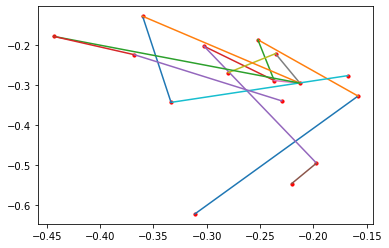

dancing


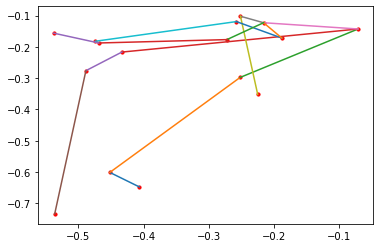

bicycling


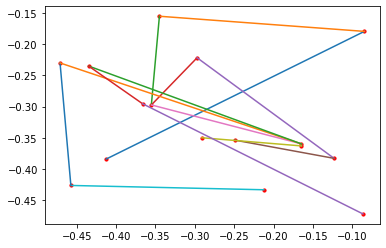

walking


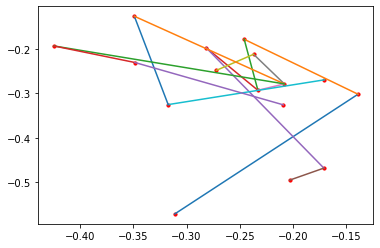

fishing and hunting


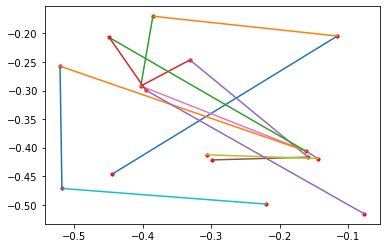

sport with ball


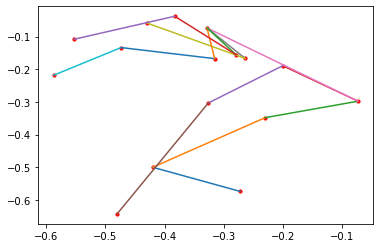

standing


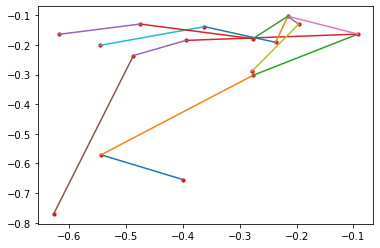

sitting


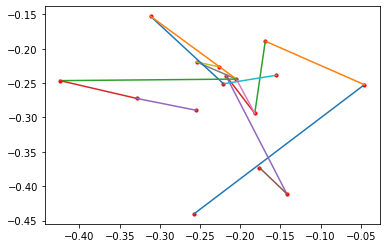

skiing


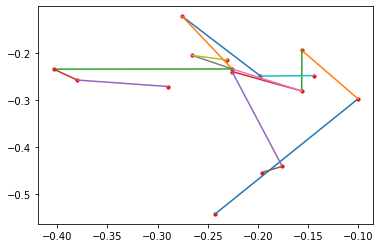

swimming


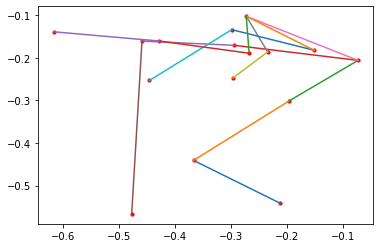

cooking


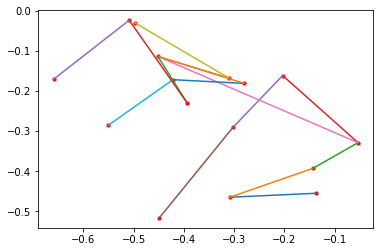

driving


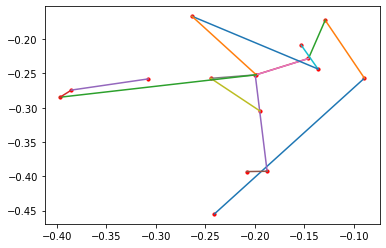

rock climbing


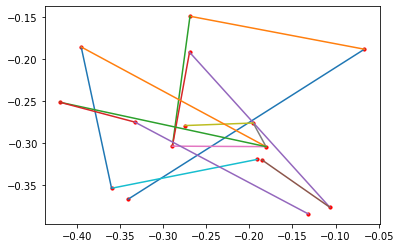

horseback


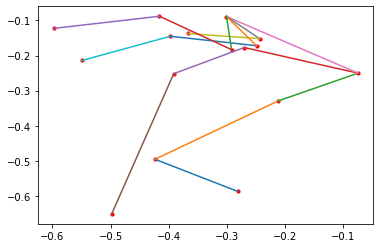

skateboarding


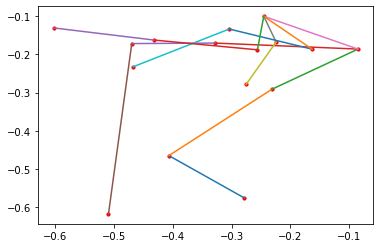

yoga


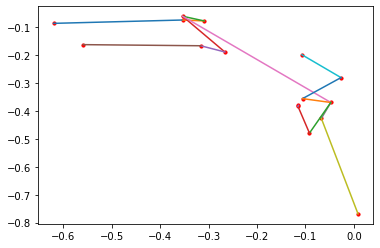

canoe


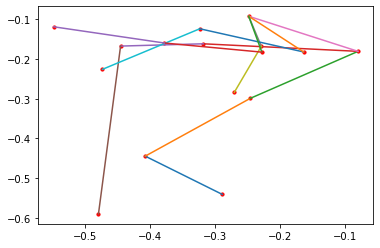

training


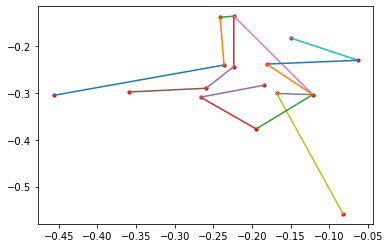

lying


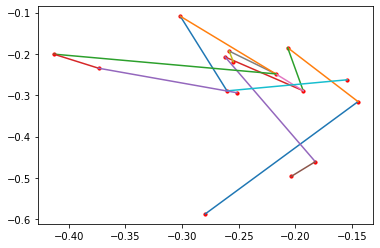

In [540]:
i = 0
for j in out:
    print(category[i])
    i += 1
    draw_keypoints(j)

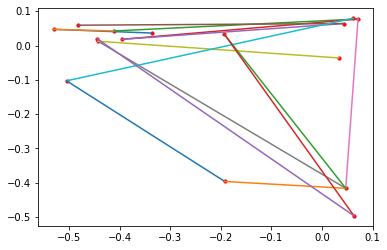

In [547]:
draw_keypoints([[ 0.3368, -0.0363],
        [ 0.5307, -0.0471],
        [ 0.4106, -0.0424],
        [ 0.3949, -0.0181],
        [-0.0430, -0.0639],
        [ 0.4816, -0.0591],
        [-0.0713, -0.0771],
        [-0.0470,  0.4159],
        [ 0.4429, -0.0124],
        [-0.0331,  0.0362],
        [-0.0617, -0.0794],
        [ 0.5052,  0.1029],
        [ 0.1923,  0.3961],
        [ 0.1935, -0.0336],
        [-0.0634,  0.4964],
        [ 0.4445, -0.0195]])

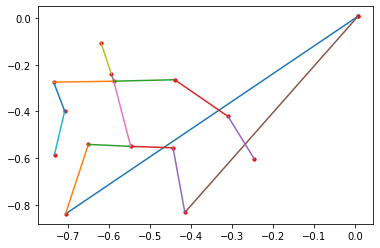

In [345]:
draw_keypoints(dataset[232][0])

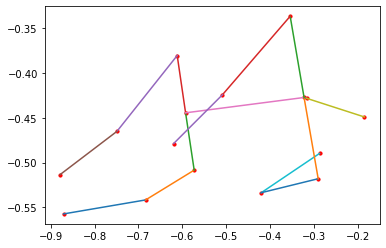

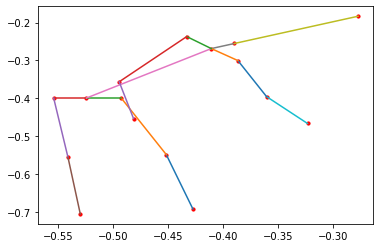

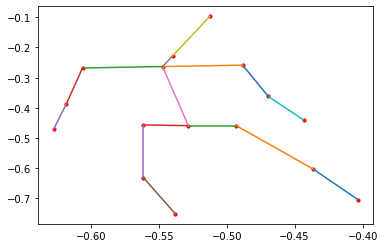

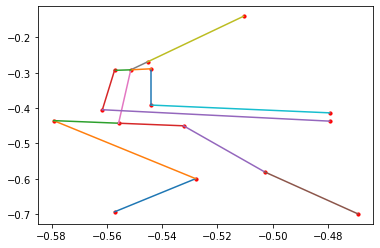

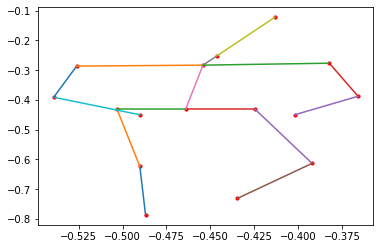

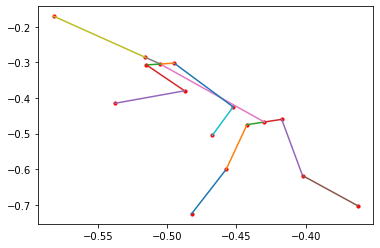

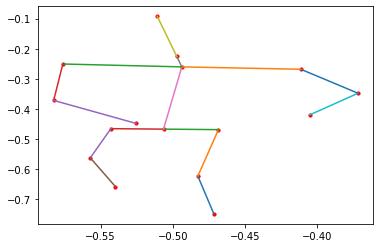

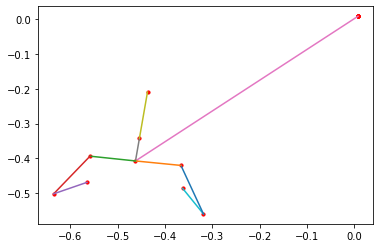

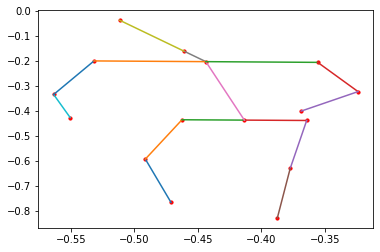

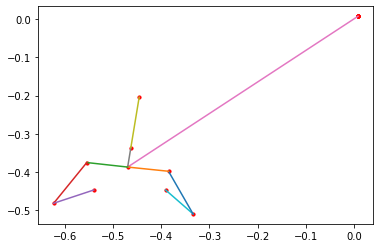

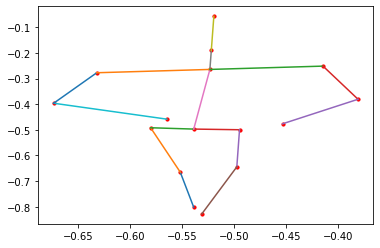

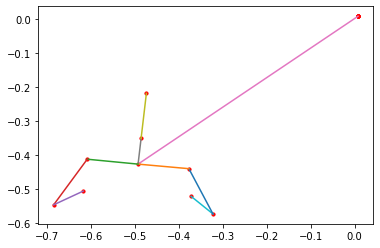

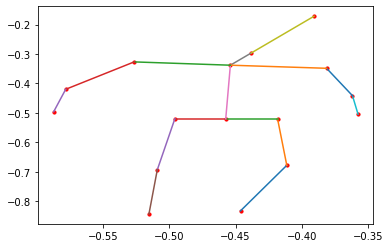

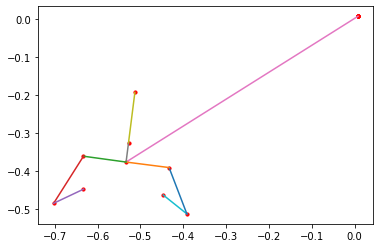

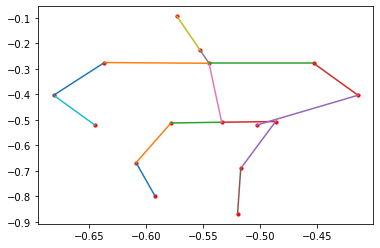

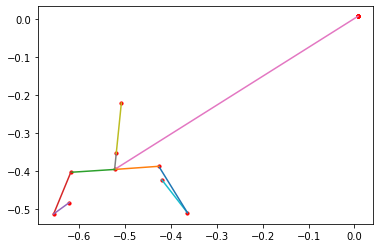

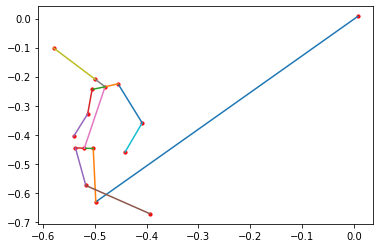

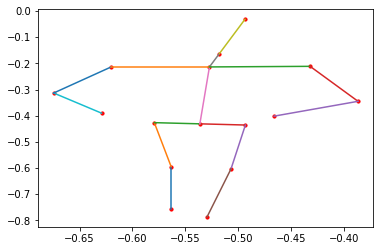

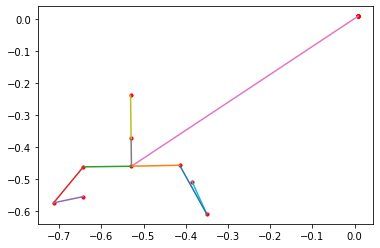

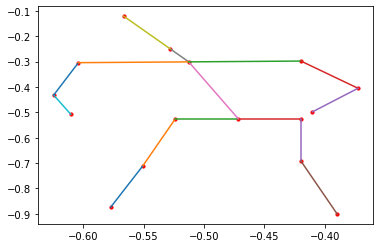

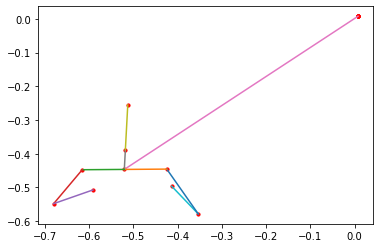

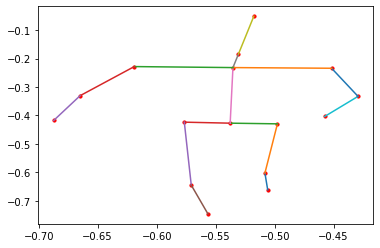

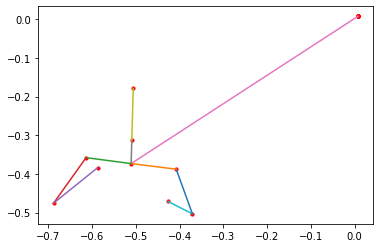

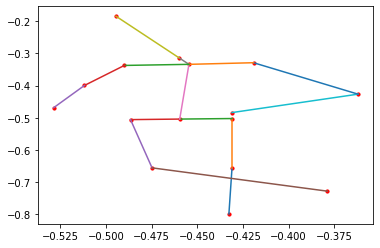

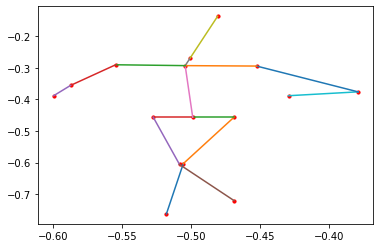

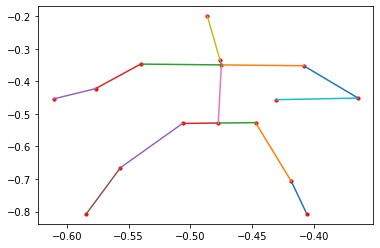

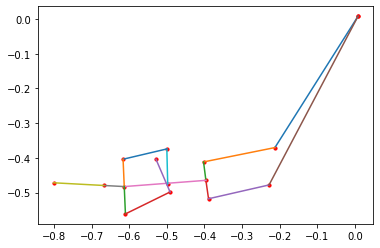

KeyboardInterrupt: 

In [379]:
label = dataset.one_hot[0]
for i in range(len(dataset)):
    if (np.array_equal(dataset.one_hot.numpy()[18], dataset[i][1].numpy())):
        draw_keypoints(dataset[i][0])